<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

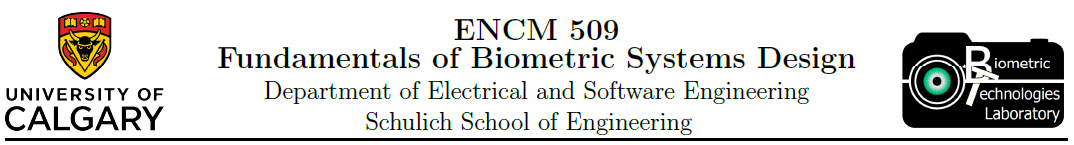

# ENCM 509 - Speaker Recognition Final Project

**Student Names**


**Mushtaba Al Yasseen (30094000)**
\
**Abhay Khosla (30085789)**
\
**Parbir Lehal (30096001)**

In [7]:
# Packages 
import numpy as np
from python_speech_features import mfcc
from sklearn.mixture import GaussianMixture
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.stats import norm

### Loading Donald Trump Data

In [8]:
NUMOFTRAININGSAMPLES = 8  # Number of samples to test

# Directory containing the testing/training data files for Donald Trump
trumpRealData = "./TrumpReal/"
donaldTrumpTrainingPaths = [f"{trumpRealData}{i}.wav" for i in range(1, NUMOFTRAININGSAMPLES + 1)]  
donaldTrumpTestingPaths = [f"{trumpRealData}{i}.wav" for i in range(NUMOFTRAININGSAMPLES + 1, 11)]
donaldTrumpAIPaths = [f"./TrumpAI/{i}.wav" for i in range(1, 11)]
print(len(donaldTrumpTrainingPaths))
print(len(donaldTrumpTestingPaths))
print(len(donaldTrumpAIPaths))

8
2
10


### Loading Justin Trudeau Data

In [9]:
# Directory containing the testing/training data files for Donald Trump
trudeauRealData = "./TrudeauReal/"
justinTrudeauTrainingPaths = [f"{trudeauRealData}{i}.wav" for i in range(1, NUMOFTRAININGSAMPLES + 1)]  
justinTrudeauTestingPaths = [f"{trudeauRealData}{i}.wav" for i in range(NUMOFTRAININGSAMPLES + 1, 11)]
justinTrudeauAIPaths = [f"./TrumpAI/{i}.wav" for i in range(1, 11)]
print(len(justinTrudeauTrainingPaths))
print(len(justinTrudeauTestingPaths))
print(len(justinTrudeauAIPaths))

8
2
10


### Donald Trump Training Data GMM Model Creation

In [10]:
# create a GMM with n components
n = 20
donaldTrumpGMM = GaussianMixture(n_components=n)

mfcc_features = None 
for file_path in donaldTrumpTrainingPaths:
    sample_rate, audio_data = wavfile.read(file_path)
    # compute MFCC features for the audio data
    mfcc_data = mfcc(audio_data, samplerate=sample_rate)
    
    # concatenate the MFCC features into a single numpy array
    if mfcc_features is None:
        mfcc_features = mfcc_data
    else:
        mfcc_features = np.concatenate((mfcc_features, mfcc_data), axis=0)
print(mfcc_features[0])

C:\Users\abhay\AppData\Local\Temp\ipykernel_9872\597205351.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read(file_path)


[-3.60436534e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.65853322e-14  0.00000000e+00  6.86433890e-14  0.00000000e+00
  7.68197924e-14  0.00000000e+00  6.74820084e-14  0.00000000e+00
  3.50716881e-14]


In [11]:
donaldTrumpGMM.fit(mfcc_features)

GaussianMixture(n_components=20)

### Donald Trump AI GMM Scoring

In [12]:
donaldTrumpAIScores = []
for donaldTrumpAIPath in donaldTrumpAIPaths:
    sample_rate, test_data = wavfile.read(donaldTrumpAIPath)
    mfcc_data = mfcc(test_data, sample_rate) 
    score = donaldTrumpGMM.score(mfcc_data)  # Calculate score
    donaldTrumpAIScores.append(score)  # Append the score for this recording
print(donaldTrumpAIScores)  

[-47.15389344067736, -47.29151424485172, -46.82847121574434, -46.97213973558027, -47.172065304163375, -47.07657549439071, -47.21776387656926, -47.19901062506429, -47.20498398404217, -47.09425783949566]


### Donald Trump Real Speech GMM Scoring

In [13]:
donaldTrumpTestScores = []
for donaldTrumpTestingPath in donaldTrumpTestingPaths:
    sample_rate, test_data = wavfile.read(donaldTrumpTestingPath)
    mfcc_data = mfcc(test_data, sample_rate) 
    score = donaldTrumpGMM.score(mfcc_data)  # Calculate score
    donaldTrumpTestScores.append(score)  # Append the score for this recording
print(donaldTrumpTestScores)  

C:\Users\abhay\AppData\Local\Temp\ipykernel_9872\396424461.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, test_data = wavfile.read(donaldTrumpTestingPath)
C:\Users\abhay\AppData\Local\Temp\ipykernel_9872\396424461.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, test_data = wavfile.read(donaldTrumpTestingPath)


[-44.78961573804486, -45.000536684504596]


### Donald Trump Probability Density Function

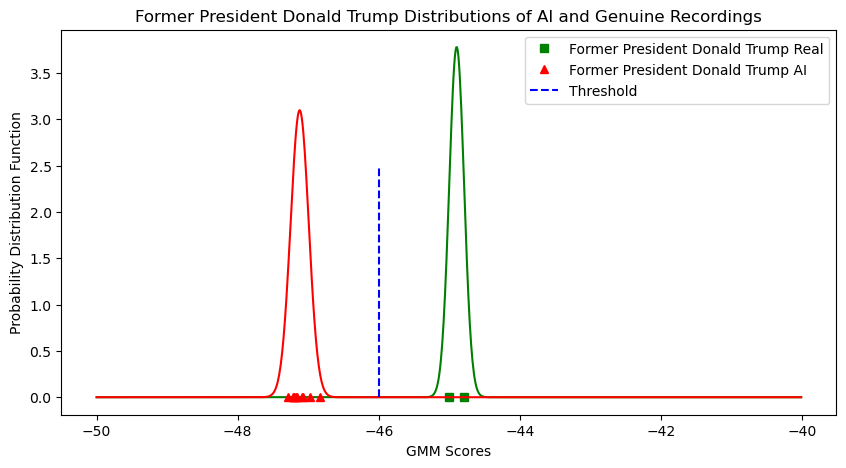

In [14]:
donaldTrumpTotalScore = list(donaldTrumpTestScores)  # Scores from the real data
donaldTrumpTotalScore.extend(donaldTrumpAIScores)  # Scores from the AI-generated data

# Generate x values
x = np.arange(-50, -40, 0.01)

# Calculate probability distributions
donaldTrumpGenuineDist = norm.pdf(x, loc=np.mean(donaldTrumpTestScores), scale=np.std(donaldTrumpTestScores))
donaldTrumpImposterDist = norm.pdf(x, loc=np.mean(donaldTrumpAIScores), scale=np.std(donaldTrumpAIScores))

donaldTrumpThreshold = -46

# Plotting
plt.figure(figsize=(10,5))
plt.plot(x, donaldTrumpGenuineDist, 'g')
plt.plot(donaldTrumpTestScores, np.zeros(len(donaldTrumpTestScores)), 'gs', lw=2, label='Former President Donald Trump Real')
plt.plot(x, donaldTrumpImposterDist, 'r')
plt.plot(donaldTrumpAIScores, np.zeros(len(donaldTrumpAIScores)), 'r^', lw=2, label='Former President Donald Trump AI')
plt.plot([donaldTrumpThreshold]*20, np.linspace(0, 2.5, 20), 'b', linestyle = "dashed", label='Threshold')
plt.xlabel("GMM Scores")
plt.ylabel("Probability Distribution Function")
plt.legend()
plt.title('Former President Donald Trump Distributions of AI and Genuine Recordings')
plt.show()

### Donald Trump Confusion Matrix

	TPR: 100.00%, TNR: 100.00%, FPR: 0.00%, FNR: 0.00%


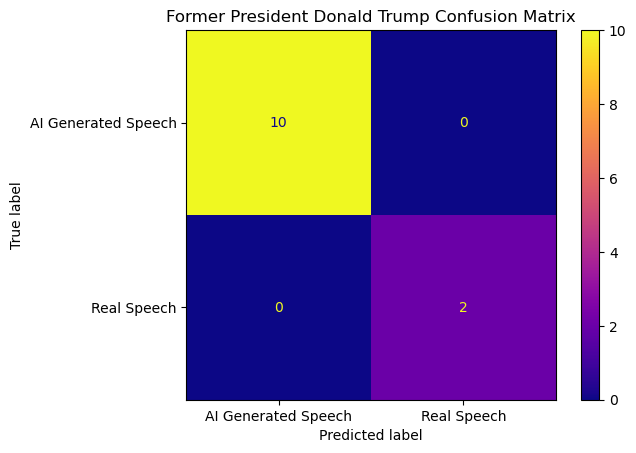

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

TP, FP, TN, FN = 0, 0, 0, 0

for score in donaldTrumpTestScores:
    if score < donaldTrumpThreshold:
        FN = FN + 1
    else:
        TN = TN + 1

for score in donaldTrumpAIScores:
    if score < donaldTrumpThreshold: 
        TP = TP + 1
    else:
        FP = FP + 1

# True Positive Rate (TPR) also known as Sensitivity or Recall
TPR = TP / (TP + FN)
# True Negative Rate (TNR) also known as Specificity
TNR = TN / (TN + FP)
# False Positive Rate (FPR)
FPR = FP / (FP + TN)
# False Negative Rate (FNR)
FNR = FN / (TP + FN)

print("\tTPR: %.2f%%, TNR: %.2f%%, FPR: %.2f%%, FNR: %.2f%%" % (TPR*100, TNR*100, FPR*100, FNR*100))

cm = np.array([[TP, FP], [FN, TN]])
labels = np.array(["AI Generated Speech", "Real Speech"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="plasma")
plt.title('Former President Donald Trump Confusion Matrix')
plt.show()

### Justin Trudeau Training Data GMM Model Creation

In [16]:
# create a GMM with n components 
n = 20
justinTrudeauGMM = GaussianMixture(n_components=n)

mfcc_features = None 
for file_path in justinTrudeauTestingPaths:
    sample_rate, audio_data = wavfile.read(file_path)
    # compute MFCC features for the audio data
    mfcc_data = mfcc(audio_data, samplerate=sample_rate)
    
    # concatenate the MFCC features into a single numpy array
    if mfcc_features is None:
        mfcc_features = mfcc_data
    else:
        mfcc_features = np.concatenate((mfcc_features, mfcc_data), axis=0)
print(mfcc_features[0])

C:\Users\abhay\AppData\Local\Temp\ipykernel_9872\4068531865.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read(file_path)


[ 11.53827548  14.09133618 -15.51908206 -14.43571324   9.99801117
 -28.23256877  22.61663658 -27.29444113  -5.13553859  18.97904868
 -12.57328282  11.39818195  -2.78481693]


In [17]:
justinTrudeauGMM.fit(mfcc_features)

GaussianMixture(n_components=20)

### Justin Trudeau AI GMM Scoring

In [19]:
justinTrudeauAIScores = []
for justinTrudeauAIPath in justinTrudeauAIPaths:
    sample_rate, test_data = wavfile.read(justinTrudeauAIPath)
    mfcc_data = mfcc(test_data, sample_rate) 
    score = justinTrudeauGMM.score(mfcc_data)  # Calculate score
    justinTrudeauAIScores.append(score)  # Append the score for this recording
print(justinTrudeauAIScores)  

[-48.720089836805336, -48.644557827890495, -51.036480616472446, -48.74660213573188, -48.57638653525444, -48.49189978377963, -48.57754504899036, -50.90347563698443, -49.00885735002097, -48.87203501188213]


### Justin Trudeau Real Speech GMM Scoring

In [20]:
justinTrudeauTestScores = []
for justinTrudeauTestingPath in justinTrudeauTestingPaths:
    sample_rate, test_data = wavfile.read(justinTrudeauTestingPath)
    mfcc_data = mfcc(test_data, sample_rate) 
    score = justinTrudeauGMM.score(mfcc_data)  # Calculate score
    justinTrudeauTestScores.append(score)  # Append the score for this recording
print(justinTrudeauTestScores)  

C:\Users\abhay\AppData\Local\Temp\ipykernel_9872\3720139509.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, test_data = wavfile.read(justinTrudeauTestingPath)
C:\Users\abhay\AppData\Local\Temp\ipykernel_9872\3720139509.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, test_data = wavfile.read(justinTrudeauTestingPath)


[-43.20796486586865, -43.255982002518444]


### Justin Trudeau Probability Density Function

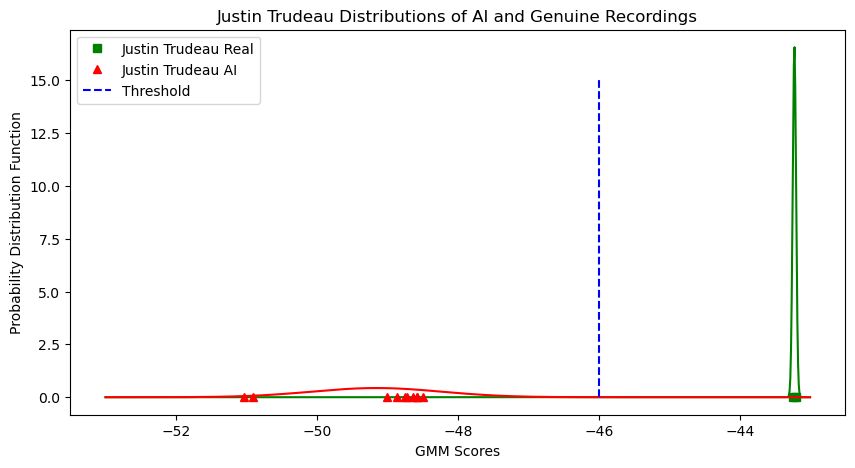

In [26]:
justinTrudeauTotalScore = list(justinTrudeauTestScores)  # Scores from the real data
justinTrudeauTotalScore.extend(justinTrudeauAIScores)  # Scores from the AI-generated data

# Generate x values
x = np.arange(-53, -43, 0.01)

# Calculate probability distributions
justinTrudeauGenuineDist = norm.pdf(x, loc=np.mean(justinTrudeauTestScores), scale=np.std(justinTrudeauTestScores))
justinTrudeauImposterDist = norm.pdf(x, loc=np.mean(justinTrudeauAIScores), scale=np.std(justinTrudeauAIScores))

justinTrudeauThreshold = -46

# Plotting
plt.figure(figsize=(10,5))
plt.plot(x, justinTrudeauGenuineDist, 'g')
plt.plot(justinTrudeauTestScores, np.zeros(len(justinTrudeauTestScores)), 'gs', lw=2, label='Justin Trudeau Real')
plt.plot(x, justinTrudeauImposterDist, 'r')
plt.plot(justinTrudeauAIScores, np.zeros(len(justinTrudeauAIScores)), 'r^', lw=2, label='Justin Trudeau AI')
plt.plot([justinTrudeauThreshold]*20, np.linspace(0, 15, 20), 'b', linestyle = "dashed", label='Threshold')
plt.xlabel("GMM Scores")
plt.ylabel("Probability Distribution Function")
plt.legend()
plt.title('Justin Trudeau Distributions of AI and Genuine Recordings')
plt.show()

	TPR: 100.00%, TNR: 100.00%, FPR: 0.00%, FNR: 0.00%


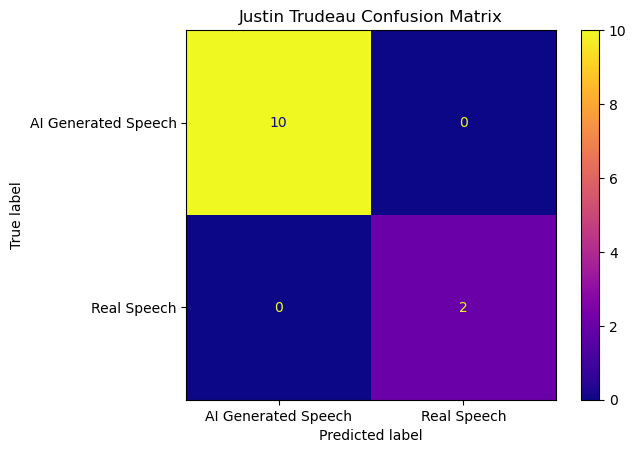

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

TP, FP, TN, FN = 0, 0, 0, 0

for score in justinTrudeauTestScores:
    if score < justinTrudeauThreshold:
        FN = FN + 1
    else:
        TN = TN + 1

for score in justinTrudeauAIScores:
    if score < justinTrudeauThreshold: 
        TP = TP + 1
    else:
        FP = FP + 1

# True Positive Rate (TPR) also known as Sensitivity or Recall
TPR = TP / (TP + FN)
# True Negative Rate (TNR) also known as Specificity
TNR = TN / (TN + FP)
# False Positive Rate (FPR)
FPR = FP / (FP + TN)
# False Negative Rate (FNR)
FNR = FN / (TP + FN)

print("\tTPR: %.2f%%, TNR: %.2f%%, FPR: %.2f%%, FNR: %.2f%%" % (TPR*100, TNR*100, FPR*100, FNR*100))

cm = np.array([[TP, FP], [FN, TN]])
labels = np.array(["AI Generated Speech", "Real Speech"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="plasma")
plt.title('Justin Trudeau Confusion Matrix')
plt.show()